In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn.functional import conv1d, conv2d
import numpy as np
from scipy import signal

In [2]:


filterKernelList = [
  0.002509435152747353,
  0.007547972481211767,
  0.009560280427366582,
  0.005678325160705147,
  -0.0015395665181704339,
  -0.003965274585687784,
  -0.0004787300789340427,
  0.0027991371042265924,
  0.000993514906393239,
  -0.0019936304159304166,
  -0.0011986760505457506,
  0.0015374902743830877,
  0.0012334895777255524,
  -0.0012134211658915053,
  -0.0012532191329833234,
  0.0010103949386506149,
  0.0012572706762844312,
  -0.0008525812852194027,
  -0.0012691519366243526,
  0.0007418247261252848,
  0.0012918292045641761,
  -0.0006444165186196637,
  -0.0013224338252105134,
  0.0005626386328330978,
  0.001361364804114139,
  -0.0004860199238911441,
  -0.0014106592767338525,
  0.0004075633715512571,
  0.0014624505862821692,
  -0.00032830643858501135,
  -0.0015184925957025337,
  0.0002472703117996068,
  0.0015806546709879379,
  -0.0001566613427064749,
  -0.0016411747567308327,
  0.00006166261410519799,
  0.0017026260682672545,
  0.000040143211986402036,
  -0.001765356632300814,
  -0.00015204113770257114,
  0.0018256818247379184,
  0.0002737622418083326,
  -0.001881696493025582,
  -0.0004035161804016949,
  0.0019337685928014407,
  0.000541821697739471,
  -0.001982199692042297,
  -0.0006910245142444117,
  0.002024322160844001,
  0.0008520824741785767,
  -0.002055741572830972,
  -0.001020362238287679,
  0.002079213705325703,
  0.0011972552187956916,
  -0.0020942298043597598,
  -0.0013845809849366939,
  0.002097301413388113,
  0.0015798608080677184,
  -0.002087994929994642,
  -0.001782733976532877,
  0.0020665285478322607,
  0.0019929259342809165,
  -0.002032057542797906,
  -0.002210338920343137,
  0.001984772306106167,
  0.002436541789060056,
  -0.0019215393461052927,
  -0.0026707189588777323,
  0.001840102770923457,
  0.0029115081219445176,
  -0.0017395842985087446,
  -0.0031570467525206167,
  0.001619489413767174,
  0.0034064616892494327,
  -0.0014802255854781685,
  -0.003660775320803398,
  0.0013181826879756018,
  0.003918235492888684,
  -0.0011328155156504587,
  -0.004176339968933465,
  0.0009262314488025278,
  0.004437604524964876,
  -0.0006951197648890718,
  -0.0047027337637612675,
  0.0004355955605919048,
  0.004969137135767011,
  -0.00014609476247491634,
  -0.005235915459434929,
  -0.0001759514275892595,
  0.005500082049390828,
  0.0005319093332938999,
  -0.005760869909515167,
  -0.000922819481188368,
  0.006017263268237365,
  0.0013491154742875334,
  -0.006270644068081035,
  -0.0018146648018742405,
  0.006524164938970316,
  0.002328300280242728,
  -0.006774003626822009,
  -0.0028963279468078823,
  0.0070145694890924705,
  0.0035200170506957534,
  -0.007246695746638208,
  -0.004206429986685214,
  0.007469157064357891,
  0.00496054163856269,
  -0.007686407446792828,
  -0.005796595373113867,
  0.00789950918677718,
  0.00673641198570318,
  -0.008100549258523887,
  -0.007794827514909987,
  0.008284657989941095,
  0.008987966909281029,
  -0.00845909609239332,
  -0.010352159411867599,
  0.008627196900587402,
  0.011939069654911325,
  -0.0087860714510989,
  -0.013821517475090798,
  0.008920147217940889,
  0.01607819301506894,
  -0.009042759740892631,
  -0.01886078560101917,
  0.009164220367397535,
  0.022431465753560042,
  -0.00926292514514495,
  -0.027194788165598532,
  0.009337602501036319,
  0.03392381052896256,
  -0.009421060194150404,
  -0.04435768491531225,
  0.009463534832490047,
  0.06285606294099673,
  -0.009508808491550906,
  -0.10562245481486887,
  0.009528668403349719,
  0.31814834666458525,
  0.49046226441972546,
  0.31814834666458525,
  0.009528668403349719,
  -0.10562245481486887,
  -0.009508808491550906,
  0.06285606294099673,
  0.009463534832490047,
  -0.04435768491531225,
  -0.009421060194150404,
  0.03392381052896256,
  0.009337602501036319,
  -0.027194788165598532,
  -0.00926292514514495,
  0.022431465753560042,
  0.009164220367397535,
  -0.01886078560101917,
  -0.009042759740892631,
  0.01607819301506894,
  0.008920147217940889,
  -0.013821517475090798,
  -0.0087860714510989,
  0.011939069654911325,
  0.008627196900587402,
  -0.010352159411867599,
  -0.00845909609239332,
  0.008987966909281029,
  0.008284657989941095,
  -0.007794827514909987,
  -0.008100549258523887,
  0.00673641198570318,
  0.00789950918677718,
  -0.005796595373113867,
  -0.007686407446792828,
  0.00496054163856269,
  0.007469157064357891,
  -0.004206429986685214,
  -0.007246695746638208,
  0.0035200170506957534,
  0.0070145694890924705,
  -0.0028963279468078823,
  -0.006774003626822009,
  0.002328300280242728,
  0.006524164938970316,
  -0.0018146648018742405,
  -0.006270644068081035,
  0.0013491154742875334,
  0.006017263268237365,
  -0.000922819481188368,
  -0.005760869909515167,
  0.0005319093332938999,
  0.005500082049390828,
  -0.0001759514275892595,
  -0.005235915459434929,
  -0.00014609476247491634,
  0.004969137135767011,
  0.0004355955605919048,
  -0.0047027337637612675,
  -0.0006951197648890718,
  0.004437604524964876,
  0.0009262314488025278,
  -0.004176339968933465,
  -0.0011328155156504587,
  0.003918235492888684,
  0.0013181826879756018,
  -0.003660775320803398,
  -0.0014802255854781685,
  0.0034064616892494327,
  0.001619489413767174,
  -0.0031570467525206167,
  -0.0017395842985087446,
  0.0029115081219445176,
  0.001840102770923457,
  -0.0026707189588777323,
  -0.0019215393461052927,
  0.002436541789060056,
  0.001984772306106167,
  -0.002210338920343137,
  -0.002032057542797906,
  0.0019929259342809165,
  0.0020665285478322607,
  -0.001782733976532877,
  -0.002087994929994642,
  0.0015798608080677184,
  0.002097301413388113,
  -0.0013845809849366939,
  -0.0020942298043597598,
  0.0011972552187956916,
  0.002079213705325703,
  -0.001020362238287679,
  -0.002055741572830972,
  0.0008520824741785767,
  0.002024322160844001,
  -0.0006910245142444117,
  -0.001982199692042297,
  0.000541821697739471,
  0.0019337685928014407,
  -0.0004035161804016949,
  -0.001881696493025582,
  0.0002737622418083326,
  0.0018256818247379184,
  -0.00015204113770257114,
  -0.001765356632300814,
  0.000040143211986402036,
  0.0017026260682672545,
  0.00006166261410519799,
  -0.0016411747567308327,
  -0.0001566613427064749,
  0.0015806546709879379,
  0.0002472703117996068,
  -0.0015184925957025337,
  -0.00032830643858501135,
  0.0014624505862821692,
  0.0004075633715512571,
  -0.0014106592767338525,
  -0.0004860199238911441,
  0.001361364804114139,
  0.0005626386328330978,
  -0.0013224338252105134,
  -0.0006444165186196637,
  0.0012918292045641761,
  0.0007418247261252848,
  -0.0012691519366243526,
  -0.0008525812852194027,
  0.0012572706762844312,
  0.0010103949386506149,
  -0.0012532191329833234,
  -0.0012134211658915053,
  0.0012334895777255524,
  0.0015374902743830877,
  -0.0011986760505457506,
  -0.0019936304159304166,
  0.000993514906393239,
  0.0027991371042265924,
  -0.0004787300789340427,
  -0.003965274585687784,
  -0.0015395665181704339,
  0.005678325160705147,
  0.009560280427366582,
  0.007547972481211767,
  0.002509435152747353
    ]



In [7]:
fs = 44100
x1 = np.zeros((1,1,1000), dtype=np.float32)
x2 = np.zeros((1,1,1000), dtype=np.float32)
x1[0,0,0] = 1
x2[0,0,-1] = 1

x1 = torch.tensor(x1)
x2 = torch.tensor(x2)

filterKernel = torch.tensor(filterKernelList)
filterKernel = filterKernel.view(1,1,-1)

In [26]:
output1 = conv1d(x1,filterKernel,stride=2, padding=(filterKernel.shape[-1]-1)//2)
output2 = conv1d(x2,filterKernel,stride=2, padding=(filterKernel.shape[-1]-1)//2)

In [29]:
#showing first 10 elements
output1[0,0,:10]

tensor([ 0.4905,  0.0095, -0.0095,  0.0095, -0.0094,  0.0093, -0.0093,  0.0092,
        -0.0090,  0.0089])

In [30]:
#showing last 10 elements
output2[0,0,-10:]

tensor([-0.0138,  0.0161, -0.0189,  0.0224, -0.0272,  0.0339, -0.0444,  0.0629,
        -0.1056,  0.3181])

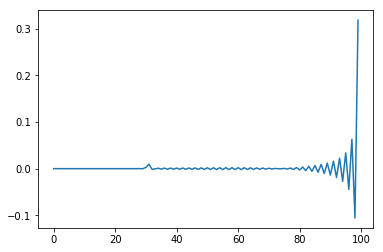

In [39]:
plt.plot(output2[0,0,-100:].numpy())

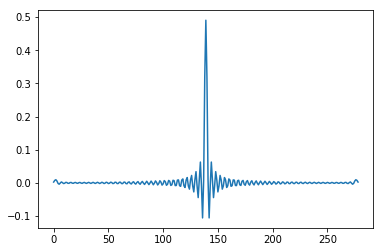

In [35]:
plt.plot(filterKernel[0,0].numpy())

In [36]:
filterKernel[0,0].max()

tensor(0.4905)

In [40]:
filterKernel[0,0][125:150]

tensor([ 0.0092,  0.0224, -0.0093, -0.0272,  0.0093,  0.0339, -0.0094, -0.0444,
         0.0095,  0.0629, -0.0095, -0.1056,  0.0095,  0.3181,  0.4905,  0.3181,
         0.0095, -0.1056, -0.0095,  0.0629,  0.0095, -0.0444, -0.0094,  0.0339,
         0.0093])

In [41]:
from scipy.signal import get_window

In [61]:
wcos = np.cos(2*np.pi*1*np.linspace(0,1,200))*get_window('hann', 200)

(-9.950000000000001, 208.95, -1.0564061930031947, 0.18727148367862642)

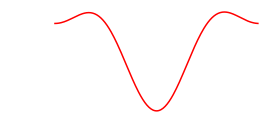

In [62]:
plt.figure(figsize=(4,2))
plt.plot(wcos, 'r')
plt.axis('off')